In [1]:
from time import time
from scipy import sparse
from scipy import linalg
import matplotlib.pyplot as plt
import nibabel as nib
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import SimpleITK as sitk
import six
from radiomics import featureextractor 
from radiomics import imageoperations
import numpy as np
from numpy import linalg

In [2]:
# Load QSM and segmentation
seg = nib.load('F:/dbs/PD_auto_qsm_t1/PD_auto_QSM/001/seg.nii')
qsm = nib.load('F:/dbs/PD_auto_qsm_t1/PD_auto_QSM/001/QSM.nii')
voxel_size = qsm.header['pixdim'][0:3]

In [3]:
seg_sitk = sitk.GetImageFromArray(seg.get_fdata())
seg_sitk.SetSpacing(voxel_size.tolist())
qsm_sitk = sitk.GetImageFromArray(qsm.get_fdata())
qsm_sitk.SetSpacing(voxel_size.tolist())
qsm_sitk_n = imageoperations.normalizeImage(qsm_sitk)

extractor0 = featureextractor.RadiomicsFeatureExtractor()
extractor0.enableAllFeatures()
# feat_class = 'glcm'
# extractor0.enableFeatureClassByName(feat_class)
# Perform global extraction to obtain bounding box for each ROI
Phi = []
for j in range(1,int(np.max(seg.get_fdata()))+1):
    featureVector = extractor0.execute(qsm_sitk,seg_sitk,label=j)
    Phi.append(featureVector)


parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [4]:
x_row = []
for j in range(int(np.max(seg.get_fdata()))):
    featureVector = Phi[j]
    for key, value in six.iteritems(featureVector):
        if 'diagnostic' in key:
            next
        else:
            x_row.append(value)

X0 = np.array(x_row)
X = sparse.coo_matrix(X0)


In [5]:
X0

array([ 5.27344127e-01,  3.81287663e-01,  5.93355981e+00,  1.55618982e+01,
        1.26491106e+01,  1.75730618e+01,  1.16431310e+01,  1.78272965e+01,
        4.54828125e+02,  8.20647563e+00,  7.07813904e-01,  4.04076174e+02,
        8.88415099e-01,  4.64062500e+02,  1.23000000e+02,  1.96000000e+02,
        2.03430140e+07,  2.31189310e+00,  3.50000000e+01,  5.20518100e+00,
        2.39000000e+02,  2.39348511e+01,  1.53740606e+02,  1.51000000e+02,
        6.00000000e+00,  2.33000000e+02,  1.62543506e+01,  1.57029293e+02,
       -6.71941332e-01,  1.14429454e+07,  2.53544904e-01,  1.02202484e+03,
        4.56541307e+01,  1.19475961e+02, -4.08465041e+00,  5.07826489e+00,
        7.25516286e-01,  7.47684517e-01,  5.15040893e-01,  1.28211484e+00,
        4.46955648e-01,  7.71386769e-01,  7.62680950e-01,  9.93039774e-01,
        9.54674170e-01, -3.22060433e-01,  8.59564049e-01,  3.83269427e-01,
        6.67568272e+00,  1.26247974e-01,  3.70785509e+00,  7.92622887e-01,
        2.53097465e-01,  

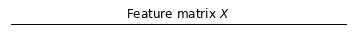

In [6]:
plt.imshow(np.expand_dims(X0,0))
plt.xticks([])
plt.yticks([])
plt.title('Feature matrix $X$');

In [7]:
X0 = X0.T

In [8]:
X0.shape

(428,)

In [9]:
linalg.matrix_rank(X0)

1

In [10]:
# UPDRS score
# Response vector u [=] n_samples x n_targets
# 1 x 4
u = np.expand_dims(np.array([0,1,24,1]).T,0)

In [11]:
# Simple 1D example
scaler = StandardScaler()
X0 = scaler.fit_transform(X0.reshape(-1,1))
X0 = X0.T

In [12]:
X0

array([[-0.09653406, -0.09653417, -0.09652981, -0.09652223, -0.09652452,
        -0.09652065, -0.09652532, -0.09652045, -0.09617674, -0.09652802,
        -0.09653392, -0.09621666, -0.09653377, -0.09616948, -0.09643773,
        -0.09638031, 15.90374275, -0.09653266, -0.09650695, -0.09653038,
        -0.09634649, -0.09651565, -0.09641355, -0.09641571, -0.09652975,
        -0.09635121, -0.09652169, -0.09641097, -0.096535  ,  8.90362146,
        -0.09653427, -0.09573063, -0.09649857, -0.0964405 , -0.09653769,
        -0.09653048, -0.0965339 , -0.09653389, -0.09653407, -0.09653347,
        -0.09653412, -0.09653387, -0.09653387, -0.09653369, -0.09653372,
        -0.09653473, -0.0965338 , -0.09653417, -0.09652922, -0.09653437,
        -0.09653156, -0.09653385, -0.09653427, -0.09652397, -0.09653207,
        -0.09653333, -0.09652941, -0.09650521, -0.09653444, -0.09650407,
        -0.09636995, -0.09653314, -0.09649836, -0.09638631, -0.08982315,
        -0.09653096, -0.09653445, -0.09653444, -0.0

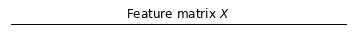

In [13]:
plt.imshow(X0)
plt.xticks([])
plt.yticks([])
plt.title('Feature matrix $X$');

In [14]:
reg = Lasso(alpha=0.1,fit_intercept=False, max_iter=10000, tol=0.1)
w_min = reg.fit(X0,u)
# reg.predict()

c:\Users\agr78\Anaconda3\envs\pdradenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [15]:
w_min.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.27220118e+02, -2.55399626e-05, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [16]:
#Closed form solution to L2 norm of Aw = u
L = linalg.det(np.matmul(X0,X0.T))
if abs(L) > 0:
    wc =np.matmul(X0.T,linalg.inv(np.matmul(X0,X0.T)))*np.squeeze(u)

In [17]:
(w_min.coef_).shape

(4, 428)

In [18]:
X0.shape

(1, 428)

In [19]:
# Compute u_est = Aw_min
u_est = np.matmul((X0),(w_min.coef_).T)

In [20]:
u_est

array([[ 0.        ,  0.99371217, 23.99371217,  0.99371217]])

In [21]:
mse = np.sum(np.sqrt((u-u_est)**2),1)

In [22]:
mse

array([0.01886348])

In [23]:
# Compute u_est = Aw_min
u_c = np.matmul((X0),(wc))

In [24]:
u_c

array([[ 0.,  1., 24.,  1.]])